In [11]:
import pymysql
import pandas as pd

# MariaDB 연결 함수
def get_db_connection():
    return pymysql.connect(
        host="localhost",  # MariaDB 호스트 (기본값: localhost)
        user="root",  # MariaDB 계정
        password="1234",  # MariaDB 비밀번호
        database="finfit",  # 사용할 데이터베이스 이름
        charset="utf8mb4",
        cursorclass=pymysql.cursors.DictCursor  # 결과를 딕셔너리 형태로 반환
    )

# 데이터를 가져오는 새로운 방식 (컬럼명 오류 해결)
def fetch_medical_data():
    conn = get_db_connection()
    query = "SELECT * FROM medical"  # medical 테이블 전체 데이터 가져오기
    
    # 직접 데이터를 가져와서 DataFrame으로 변환
    with conn.cursor() as cursor:
        cursor.execute(query)
        data = cursor.fetchall()  # 데이터를 가져옴

    conn.close()  # 연결 종료

    # 데이터를 DataFrame으로 변환
    df = pd.DataFrame(data)

    # 정리된 데이터 확인
    print("✅ 새로운 방식으로 데이터 로드 완료! 상위 5개 데이터:")
    display(df.head())  # Jupyter Notebook에서 보기 좋게 출력

    return df

# 실행
df_medical = fetch_medical_data()


✅ 새로운 방식으로 데이터 로드 완료! 상위 5개 데이터:


,id,year,region,sex,age,age_group_id,height,weight,bmi,bmi_category,...,alchol_1year,hour_sitting,minute_sitting,walk_day,walk_hour,walk_minute,weight_day,weight_hour,body_activity,stress
0,1,2023,1,1,75,5,159.8,58.9,23.0654,2,...,8,3,10,8,1,0,6,88,0.0,3
1,2,2023,1,2,70,5,151.2,41.8,18.2841,0,...,8,99,99,4,0,40,1,88,0.0,3
2,3,2023,1,2,42,4,156.7,53.5,21.7879,1,...,5,5,0,8,0,30,1,88,0.0,3
3,4,2023,1,2,9,2,142.0,35.8,17.7544,0,...,8,88,88,88,88,88,8,88,NaN,8
4,5,2023,1,1,43,4,185.0,79.8,23.3163,2,...,4,9,0,1,88,88,1,88,0.0,3


In [12]:
# 사용할 컬럼만 선택
selected_columns = [
    "age", "sex", "bmi", "fasting_blood_sugar", "sbp_average", "dbp_average",
    "chol_total", "chol_hdl", "chol_ldl", "chol_tg", "alchol", "smoking_history", "stress",
    "dyslipidemia_status", "diabetes", "high_blood_pressure"
]

df_medical = df_medical[selected_columns]

# 데이터 확인
print("✅ 선택한 데이터 확인:")
display(df_medical.head())


✅ 선택한 데이터 확인:


,age,sex,bmi,fasting_blood_sugar,sbp_average,dbp_average,chol_total,chol_hdl,chol_ldl,chol_tg,alchol,smoking_history,stress,dyslipidemia_status,diabetes,high_blood_pressure
0,75,1,23.0654,125.0,142.0,88.0,166.0,38.0,162.0,101.0,1,3,3,1,0,1
1,70,2,18.2841,105.0,131.0,84.0,218.0,67.0,74.0,139.0,1,3,3,0,0,0
2,42,2,21.7879,102.0,103.0,60.5,196.0,87.0,43.0,105.0,2,3,3,0,0,0
3,9,2,17.7544,NaN,139.0,62.0,NaN,NaN,NaN,NaN,8,8,8,0,0,0
4,43,1,23.3163,101.0,131.0,95.0,176.0,40.0,145.0,116.0,2,2,3,0,0,1


In [13]:
# 결측치가 있는 행 삭제
df_medical.dropna(inplace=True)

# 결측치가 잘 처리되었는지 다시 확인
missing_values_after = df_medical.isnull().sum()

print("✅ 결측치 삭제 완료! 남아있는 결측치 개수:")
display(missing_values_after)

# 데이터 개수 확인
print(f"✅ 데이터 개수: {df_medical.shape[0]}개 행, {df_medical.shape[1]}개 컬럼")


✅ 결측치 삭제 완료! 남아있는 결측치 개수:


age                    0
sex                    0
bmi                    0
fasting_blood_sugar    0
sbp_average            0
dbp_average            0
chol_total             0
chol_hdl               0
chol_ldl               0
chol_tg                0
alchol                 0
smoking_history        0
stress                 0
dyslipidemia_status    0
diabetes               0
high_blood_pressure    0
dtype: int64

✅ 데이터 개수: 6027개 행, 16개 컬럼


In [14]:
# 컬럼별 데이터 타입 확인
print("✅ 컬럼별 데이터 타입:")
print(df_medical.dtypes)


✅ 컬럼별 데이터 타입:
age                      int64
sex                      int64
bmi                    float64
fasting_blood_sugar    float64
sbp_average            float64
dbp_average            float64
chol_total             float64
chol_hdl               float64
chol_ldl               float64
chol_tg                float64
alchol                   int64
smoking_history          int64
stress                   int64
dyslipidemia_status      int64
diabetes                 int64
high_blood_pressure      int64
dtype: object


In [17]:
from sklearn.model_selection import train_test_split

# 🎯 입력(Feature) 데이터(X) & 정답(Label) 데이터(y) 올바르게 설정
X = df_medical[[
    "age", "sex", "bmi", "fasting_blood_sugar", "sbp_average", "dbp_average",
    "chol_total", "chol_hdl", "chol_ldl", "chol_tg", "alchol", "smoking_history", "stress"
]]  # ✅ 정확한 Feature 컬럼

y = df_medical[["dyslipidemia_status", "diabetes", "high_blood_pressure"]]  # ✅ 정답(Label) 컬럼

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print(f"✅ 학습 데이터 개수: {X_train.shape[0]}개")
print(f"✅ 테스트 데이터 개수: {X_test.shape[0]}개")


✅ 학습 데이터 개수: 4821개
✅ 테스트 데이터 개수: 1206개


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 🎯 과적합 방지 설정을 적용한 랜덤 포레스트 모델 학습
models = {}
predictions = {}
accuracies = {}

for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    # 랜덤 포레스트 모델 생성 (과적합 방지 적용)
    model = RandomForestClassifier(
        n_estimators=50,        # 트리 개수 줄이기 (100 → 50)
        max_depth=10,           # 최대 깊이 제한 (무제한 → 10)
        min_samples_split=5,    # 노드를 나눌 최소 샘플 수 (2 → 5)
        min_samples_leaf=3,     # 리프 노드의 최소 샘플 수 (1 → 3)
        random_state=42
    )
    
    # 모델 학습 (훈련 데이터)
    model.fit(X_train, y_train[disease])
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9701
✅ high_blood_pressure 예측 모델 정확도: 1.0000


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 🎯 더 강한 과적합 방지 설정 적용
models = {}
predictions = {}
accuracies = {}

for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    # 랜덤 포레스트 모델 생성 (과적합 방지 추가 적용)
    model = RandomForestClassifier(
        n_estimators=50,        # 트리 개수 유지 (50)
        max_depth=5,            # 트리 깊이 더 줄이기 (10 → 5)
        min_samples_split=10,   # 노드를 나누는 최소 샘플 수 증가 (5 → 10)
        min_samples_leaf=5,     # 리프 노드의 최소 샘플 수 증가 (3 → 5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        random_state=42
    )
    
    # 모델 학습 (훈련 데이터)
    model.fit(X_train, y_train[disease])
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9718
✅ high_blood_pressure 예측 모델 정확도: 1.0000


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 🎯 새로운 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용할 때, 각 질병별로 따로 적용
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 랜덤 포레스트 모델 생성 (이전보다 더 보수적인 설정)
    model = RandomForestClassifier(
        n_estimators=30,        # 트리 개수 더 줄이기 (50 → 30)
        max_depth=5,            # 트리 깊이 유지 (5)
        min_samples_split=10,   # 최소 샘플 분할 유지 (10)
        min_samples_leaf=5,     # 리프 노드 최소 샘플 유지 (5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        random_state=42
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9312
✅ high_blood_pressure 예측 모델 정확도: 0.9809


c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IP

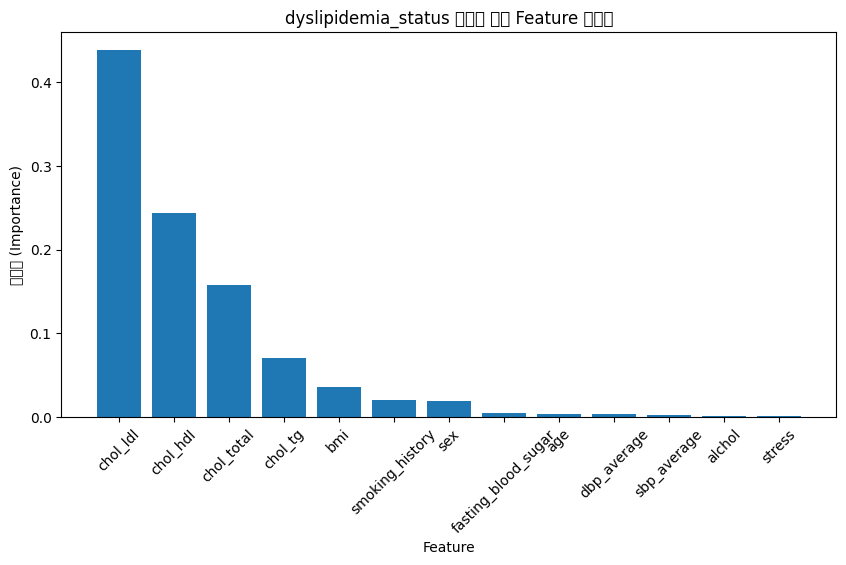

c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IP

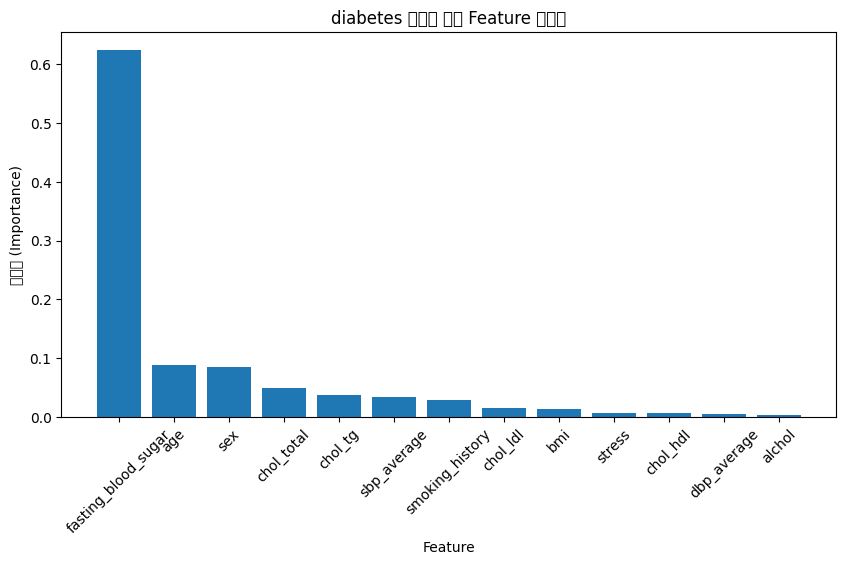

c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IP

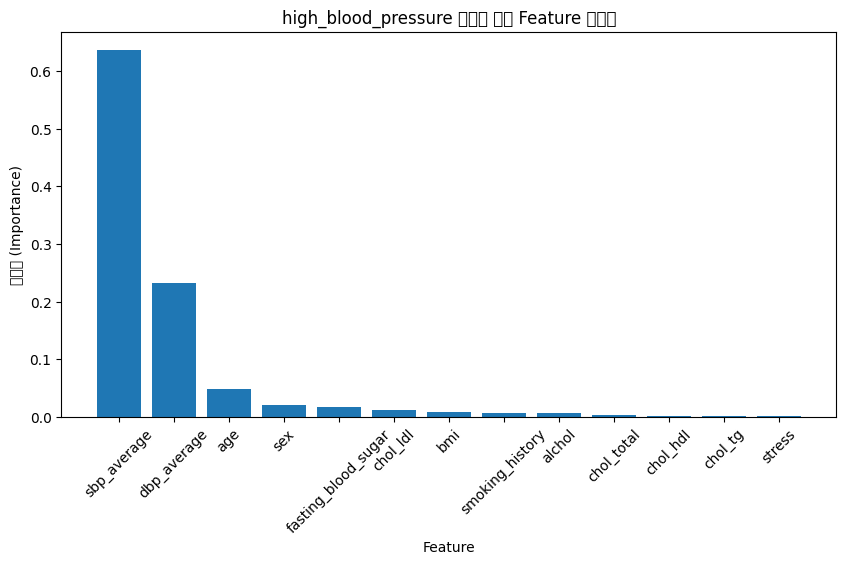

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature 중요도 출력 함수
def plot_feature_importance(model, disease, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title(f"{disease} 예측을 위한 Feature 중요도")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("중요도 (Importance)")
    plt.show()

# 각 질병별 Feature 중요도 출력
for disease in models.keys():
    plot_feature_importance(models[disease], disease, X_train.columns)


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 🎯 사용할 Feature만 선택
selected_features = ["sbp_average", "dbp_average", "age", "sex"]

# 🎯 X 데이터 다시 정의
X = df_medical[selected_features]

# 🎯 학습/테스트 데이터 다시 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 새로운 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용할 때, 각 질병별로 따로 적용
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 랜덤 포레스트 모델 생성 (과적합 방지 적용)
    model = RandomForestClassifier(
        n_estimators=30,        # 트리 개수 유지 (30)
        max_depth=5,            # 트리 깊이 유지 (5)
        min_samples_split=10,   # 최소 샘플 분할 유지 (10)
        min_samples_leaf=5,     # 리프 노드 최소 샘플 유지 (5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        random_state=42
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 0.6493
✅ diabetes 예측 모델 정확도: 0.7032
✅ high_blood_pressure 예측 모델 정확도: 1.0000


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (sbp_average, dbp_average)
scaler = StandardScaler()
df_medical[["sbp_average_scaled", "dbp_average_scaled"]] = scaler.fit_transform(df_medical[["sbp_average", "dbp_average"]])

# 🎯 새로운 Feature 추가 (혈압 비율)
df_medical["sbp_dbp_ratio"] = df_medical["sbp_average"] / df_medical["dbp_average"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 랜덤 포레스트 모델 생성 (과적합 방지 적용)
    model = RandomForestClassifier(
        n_estimators=30,        # 트리 개수 유지 (30)
        max_depth=5,            # 트리 깊이 유지 (5)
        min_samples_split=10,   # 최소 샘플 분할 유지 (10)
        min_samples_leaf=5,     # 리프 노드 최소 샘플 유지 (5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        random_state=42
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9303
✅ high_blood_pressure 예측 모델 정확도: 0.9925


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 랜덤 포레스트 모델 생성 (과적합 방지 적용)
    model = RandomForestClassifier(
        n_estimators=30,        # 트리 개수 유지 (30)
        max_depth=5,            # 트리 깊이 유지 (5)
        min_samples_split=10,   # 최소 샘플 분할 유지 (10)
        min_samples_leaf=5,     # 리프 노드 최소 샘플 유지 (5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        random_state=42
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9196
✅ high_blood_pressure 예측 모델 정확도: 0.9900


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 🎯 랜덤 포레스트 모델 생성 (class_weight 추가)
    model = RandomForestClassifier(
        n_estimators=30,        # 트리 개수 유지 (30)
        max_depth=5,            # 트리 깊이 유지 (5)
        min_samples_split=10,   # 최소 샘플 분할 유지 (10)
        min_samples_leaf=5,     # 리프 노드 최소 샘플 유지 (5)
        max_features='sqrt',    # 일부 Feature만 학습하도록 제한
        class_weight="balanced",  # ✅ 클래스 불균형 조정 (과적합 방지)
        random_state=42
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9196
✅ high_blood_pressure 예측 모델 정확도: 0.9900


In [27]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 4.5/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 6.3/150.0 MB 11.4 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/150.0 MB 9.7 MB/s eta 0:00:15
   -- ------------------------------------- 10.5/150.0 MB 10.1 MB/s eta 0:00:14
   --- ------------------------------------ 12.6/150.0 MB 10.0 MB/s eta 0:00:14
   --- ------------------------------------ 14.2/150.0 MB 9.6 MB/s eta 0:00:15
   ---- ----------------------------------- 16.5/150.0 MB 9.8 MB/s eta 0:00:14
   ----- ---------------------------------- 19.1/150.0 MB 10.1 MB/s eta 0:00:13
   ----- ---------------------------------- 21.8/150.0 MB 10.3 MB/s eta 0:00:13
   ------ --------------------------------- 24.1/150.0 MB 10.4 MB/s eta 0:00:13
   ------- -------------------------------- 26.5/150.0 M

In [28]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 🎯 XGBoost 모델 생성 (규제 적용)
    model = XGBClassifier(
        n_estimators=100,        # 트리 개수
        max_depth=4,             # 트리 깊이 제한 (5 → 4)
        learning_rate=0.05,      # 학습률 (default 0.1 → 0.05로 낮춰서 과적합 방지)
        colsample_bytree=0.8,    # Feature 샘플링 비율 (1.0 → 0.8로 낮춤)
        reg_lambda=1.0,          # L2 규제 (릿지)
        reg_alpha=0.5,           # L1 규제 (라쏘)
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ dyslipidemia_status 예측 모델 정확도: 1.0000
✅ diabetes 예측 모델 정확도: 0.9362
✅ high_blood_pressure 예측 모델 정확도: 0.9959


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 🎯 XGBoost 모델 생성 (과적합 방지 강화)
    model = XGBClassifier(
        n_estimators=100,        # 트리 개수
        max_depth=4,             # 트리 깊이 제한 (5 → 4)
        learning_rate=0.02,      # 학습률 (default 0.1 → 0.02로 낮춰서 과적합 방지)
        subsample=0.7,           # 학습 데이터 일부만 사용 (1.0 → 0.7로 낮춤)
        colsample_bytree=0.7,    # 일부 Feature만 학습하도록 제한
        reg_lambda=5.0,          # L2 규제 (릿지) 더 강화
        reg_alpha=2.0,           # L1 규제 (라쏘) 더 강화
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ dyslipidemia_status 예측 모델 정확도: 1.0000


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ diabetes 예측 모델 정확도: 0.9353
✅ high_blood_pressure 예측 모델 정확도: 0.9975


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 🎯 XGBoost 모델 생성 (더 강한 과적합 방지 적용)
    model = XGBClassifier(
        n_estimators=200,        # 트리 개수 증가 (100 → 200)
        max_depth=3,             # 트리 깊이 더 낮춤 (4 → 3)
        learning_rate=0.005,     # 학습률 더 낮춤 (0.02 → 0.005)
        subsample=0.7,           # 학습 데이터 일부만 사용 (1.0 → 0.7로 낮춤)
        colsample_bytree=0.7,    # 일부 Feature만 학습하도록 제한
        reg_lambda=10.0,         # L2 규제 (릿지) 더 강화 (5.0 → 10.0)
        reg_alpha=5.0,           # L1 규제 (라쏘) 더 강화 (2.0 → 5.0)
        gamma=5.0,               # 🎯 트리 분할을 제한해서 불필요한 분할 방지
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ dyslipidemia_status 예측 모델 정확도: 1.0000


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ diabetes 예측 모델 정확도: 0.9287


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ high_blood_pressure 예측 모델 정확도: 0.9975


c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\venvs\finfit\Lib\site-packages\IPyt

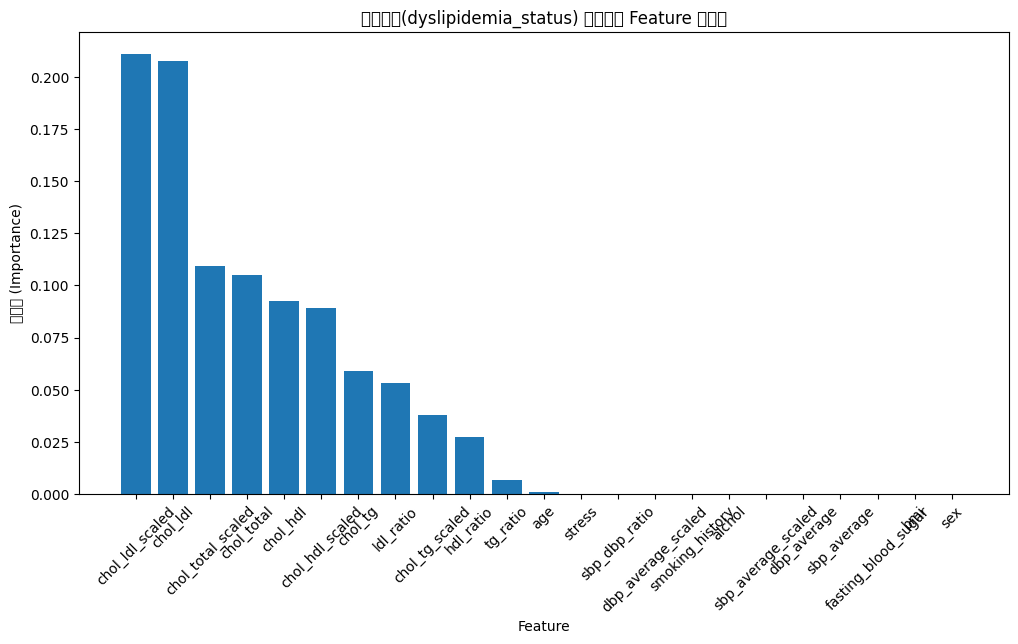

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 🎯 고지혈증 모델에서 Feature 중요도 가져오기
feature_importance = models["dyslipidemia_status"].feature_importances_
feature_names = X_train.columns

# 🎯 중요도가 높은 순서대로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 🎯 시각화
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("중요도 (Importance)")
plt.title("고지혈증(dyslipidemia_status) 예측에서 Feature 중요도")
plt.show()


In [32]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🎯 Feature Scaling 적용 (콜레스테롤 관련 Feature)
scaler = StandardScaler()
df_medical[["chol_total_scaled", "chol_hdl_scaled", "chol_ldl_scaled", "chol_tg_scaled"]] = scaler.fit_transform(
    df_medical[["chol_total", "chol_hdl", "chol_ldl", "chol_tg"]])

# 🎯 새로운 Feature 추가 (콜레스테롤 비율)
df_medical["hdl_ratio"] = df_medical["chol_hdl"] / df_medical["chol_total"]
df_medical["ldl_ratio"] = df_medical["chol_ldl"] / df_medical["chol_total"]
df_medical["tg_ratio"] = df_medical["chol_tg"] / df_medical["chol_total"]

# 🎯 모든 Feature 사용 (정답 컬럼 제외)
target_columns = ["dyslipidemia_status", "diabetes", "high_blood_pressure"]
X = df_medical.drop(columns=target_columns)  # ✅ 정답 컬럼을 제외한 모든 컬럼 사용
y = df_medical[target_columns]  # ✅ 정답(Label) 데이터

# 🎯 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 모델 학습을 위한 준비
models = {}
predictions = {}
accuracies = {}

# SMOTE 적용 후 모델 학습
for disease in ["dyslipidemia_status", "diabetes", "high_blood_pressure"]:
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[disease])
    
    # 🎯 XGBoost 모델 생성 (Feature 중요도 조절 적용)
    model = XGBClassifier(
        n_estimators=200,        # 트리 개수 유지 (200)
        max_depth=3,             # 트리 깊이 유지 (3)
        learning_rate=0.005,     # 학습률 유지 (0.005)
        subsample=0.7,           # 학습 데이터 일부만 사용 (0.7)
        colsample_bytree=0.5,    # ✅ Feature 일부만 학습 (0.7 → 0.5로 낮춤)
        reg_lambda=10.0,         # L2 규제 유지 (10.0)
        reg_alpha=10.0,          # ✅ L1 규제 더 강화 (5.0 → 10.0)
        gamma=5.0,               # 트리 분할 제한 (5.0)
        interaction_constraints=[["chol_total_scaled", "chol_ldl_scaled", "chol_hdl_scaled", "chol_tg_scaled"]],
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    
    # 모델 학습 (SMOTE 적용된 데이터 사용)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test[disease], y_pred)
    
    # 결과 저장
    models[disease] = model
    predictions[disease] = y_pred
    accuracies[disease] = accuracy

    print(f"✅ {disease} 예측 모델 정확도: {accuracy:.4f}")


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ dyslipidemia_status 예측 모델 정확도: 0.9436


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ diabetes 예측 모델 정확도: 0.9088


c:\venvs\finfit\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ high_blood_pressure 예측 모델 정확도: 0.9453


In [33]:
import pickle

# 🎯 모델을 저장할 파일명
model_filenames = {
    "dyslipidemia_status": "dyslipidemia_model.pkl",
    "diabetes": "diabetes_model.pkl",
    "high_blood_pressure": "high_blood_pressure_model.pkl"
}

# 🎯 각 모델을 `.pkl` 파일로 저장
for disease, model in models.items():
    with open(model_filenames[disease], "wb") as f:
        pickle.dump(model, f)
    print(f"✅ {disease} 모델이 '{model_filenames[disease]}' 파일로 저장됨!")


✅ dyslipidemia_status 모델이 'dyslipidemia_model.pkl' 파일로 저장됨!
✅ diabetes 모델이 'diabetes_model.pkl' 파일로 저장됨!
✅ high_blood_pressure 모델이 'high_blood_pressure_model.pkl' 파일로 저장됨!
